## Player Rankings and Machine Learning

In [5]:
import pandas as pd
import numpy as np

import os
pd.set_option('display.max_columns', 999)

In [67]:

path = os.getcwd()

forwards = pd.read_pickle(path+'/preprocessed/final/forwards.pkl')
defenders = pd.read_pickle(path+'/preprocessed/final/defenders.pkl')
midfielders = pd.read_pickle(path+'/preprocessed/final/midfielders.pkl')

In [68]:
defenders.describe()

,duels_won_Air duel,duels_won_Ground attacking duel,duels_won_Ground defending duel,duels_won_Ground loose ball duel,duels_total_Air duel,duels_total_Ground attacking duel,duels_total_Ground defending duel,duels_total_Ground loose ball duel,duels_total duels,duels_duels %,duels_Air duel %,duels_Ground attacking duel %,duels_Ground defending duel %,duels_Ground loose ball duel %,passes_acc_Cross,passes_acc_Hand pass,passes_acc_Head pass,passes_acc_High pass,passes_acc_Launch,passes_acc_Simple pass,passes_acc_Smart pass,passes_total_Cross,passes_total_Hand pass,passes_total_Head pass,passes_total_High pass,passes_total_Launch,passes_total_Simple pass,passes_total_Smart pass,passes_total passes,passes_passes %,passes_acc_Cross %,passes_acc_Hand pass %,passes_acc_Head pass %,passes_acc_High pass %,passes_acc_Launch %,passes_acc_Simple pass %,passes_acc_Smart pass %,matches_minutes,matches_bench,matches_start,matches_leauge_total_games,matches_leauge_total_minutes,matches_minutes %,matches_bench %,matches_start %,player_info_weight,player_info_currentTeamId,player_info_height,player_info_age
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,24.837873,9.661479,56.472114,15.981842,71.573281,55.814527,126.675746,49.788586,303.852140,0.360430,0.372175,0.163026,0.451910,0.321787,9.123217,0.010376,38.232166,42.324254,7.267185,580.784695,2.455253,28.057069,0.011673,57.594034,78.439689,16.616083,624.944228,5.979248,811.642023,0.823333,0.284741,0.004972,0.643713,0.522518,0.402925,0.915967,0.331952,1633.129702,8.465629,18.198444,37.263294,3353.696498,0.487357,0.226554,0.488793,77.062257,2334.679637,182.796368,28.783398
std,17.549438,11.078741,34.801070,10.485720,55.834177,54.028377,76.124769,30.906573,181.589551,0.067379,0.141012,0.113090,0.095894,0.135801,12.705112,0.190410,27.515744,34.380736,6.143623,419.484873,3.469198,37.373501,0.224751,40.737932,58.857543,12.764417,439.562780,7.191054,532.654008,0.072397,0.234595,0.069089,0.157309,0.141817,0.212146,0.058658,0.300967,931.129796,7.062967,10.516199,1.551518,139.636657,0.277790,0.187857,0.282443,8.491020,1118.201154,12.866095,4.155864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.416667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34.000000,3060.000000,0.000585,0.000000,0.000000,0.000000,674.000000,0.000000,19.000000
25%,10.500000,2.000000,28.000000,8.000000,28.000000,18.000000,62.500000,24.000000,155.500000,0.321871,0.298507,0.101358,0.400000,0.258843,0.000000,0.000000,16.000000,14.500000,2.000000,260.500000,0.000000,2.000000,0.000000,25.000000,29.000000,6.000000,276.000000,1.000000,375.000000,0.780550,0.000000,0.000000,0.600699,0.453617,0.312500,0.892557,0.000000,859.500000,3.000000,9.000000,38.000000,3420.000000,0.259503,0.078947,0.263158,73.000000,1611.000000,180.000000,26.000000
50%,23.000000,6.000000,56.000000,15.000000,60.000000,39.000000,129.000000,49.000000,305.000000,0.354212,0.361290,0.159341,0.447059,0.319149,3.000000,0.000000,35.000000,35.000000,6.000000,525.000000,1.000000,10.000000,0.000000,54.000000,70.000000,14.000000,575.000000,4.000000,799.000000,0.830601,0.297297,0.000000,0.659091,0.529412,0.416667,0.925926,0.333333,1684.000000,7.000000,19.000000,38.000000,3420.000000,0.500585,0.184211,0.500000,77.000000,2454.000000,18

# Rankings
The rankings will consists of three major parts:
    1. Events
    2. Age
    3. EOP - Experience on the pitch
    
Age and EOP will be the same for each position but the event will differ. 

## Defenders
Passes
The most important feature is the simple pass and therefore we will include it in the ranking for the Defenders.


In [69]:
defenders.filter(regex=('passes_total')).describe().loc[['std','mean']]

,passes_total_Cross,passes_total_Hand pass,passes_total_Head pass,passes_total_High pass,passes_total_Launch,passes_total_Simple pass,passes_total_Smart pass,passes_total passes
std,37.373501,0.224751,40.737932,58.857543,12.764417,439.562780,7.191054,532.654008
mean,28.057069,0.011673,57.594034,78.439689,16.616083,624.944228,5.979248,811.642023


In [70]:
defenders.filter(regex=('passes_'), axis=0)

,duels_won_Air duel,duels_won_Ground attacking duel,duels_won_Ground defending duel,duels_won_Ground loose ball duel,duels_total_Air duel,duels_total_Ground attacking duel,duels_total_Ground defending duel,duels_total_Ground loose ball duel,duels_total duels,duels_duels %,duels_Air duel %,duels_Ground attacking duel %,duels_Ground defending duel %,duels_Ground loose ball duel %,passes_acc_Cross,passes_acc_Hand pass,passes_acc_Head pass,passes_acc_High pass,passes_acc_Launch,passes_acc_Simple pass,passes_acc_Smart pass,passes_total_Cross,passes_total_Hand pass,passes_total_Head pass,passes_total_High pass,passes_total_Launch,passes_total_Simple pass,passes_total_Smart pass,passes_total passes,passes_passes %,passes_acc_Cross %,passes_acc_Hand pass %,passes_acc_Head pass %,passes_acc_High pass %,passes_acc_Launch %,passes_acc_Simple pass %,passes_acc_Smart pass %,matches_minutes,matches_bench,matches_start,matches_team_country,matches_leauge_total_games,matches_leauge_total_minutes,matches_minutes %,matches_bench %,matches_start %,player_info_weight,player_info_firstName,player_info_middleName,player_info_lastName,player_info_currentTeamId,player_info_birthDate,player_info_height,player_info_foot,player_info_age,player_info_position,player_info_team_city,player_info_team,player_info_team_country
playerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### As seen above simple pass has by far the highest amount of recorded evnts. However head pass and high pass do have a mean of 57, 78 per season.  Those are important features for defenders as it tells how good the player is on find players with longer pases from the back.

In [71]:
defPassRank = defenders.loc[:,['passes_total_Simple pass', 'passes_acc_Simple pass %','passes_total_High pass', 'passes_acc_High pass %', 'passes_total_Head pass', 'matches_minutes','passes_acc_Head pass %']]

The total amount of passes are also important but we have to normalzie it somehow, as a player could have been injured or been out of the game of some other reason. We normalize the total pass by dividing the total passes with passes per 90 min. Then we get how many passes completed per 90 min. 

In [72]:
defPassRank['passes_simple_passes_per_90'] = defenders.apply(lambda x: (x['passes_total_Simple pass'] /x['matches_minutes']) * 90 , axis=1)

In [74]:
defPassRank.drop(columns=['matches_minutes', 'passes_total_Simple pass'])


,passes_acc_Simple pass %,passes_total_High pass,passes_acc_High pass %,passes_total_Head pass,passes_acc_Head pass %,passes_simple_passes_per_90
playerId,,,,,,
36,0.969343,140.0,0.571429,46.0,0.739130,52.423469
48,0.954292,160.0,0.550000,155.0,0.709677,55.308989
74,0.980139,53.0,0.433962,50.0,0.620000,62.763158
77,0.961248,209.0,0.636364,104.0,0.692308,42.320000
102,0.966952,179.0,0.541899,106.0,0.575472,50.190658
...,...,...,...,...,...,...
493725,0.750000,0.0,0.000000,0.0,0.000000,36.000000
499295,0.884615,1.0,1.000000,2.0,1.000000,26.000000
503185,1.000000,0.0,0.000000,0.0,0.000000,4.500000


*********
# Duels

Text(0.5, 1.0, 'Amount of duels for defenders')

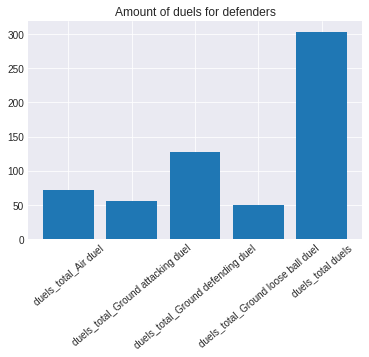

In [75]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-dark')
plt.grid(True)

d = defenders.filter(regex=('duels_total'))
a = d.describe().loc[['mean','std']].values
plt.bar(d.columns, a[0], label='mean')
plt.xticks(rotation=40)
plt.title('Amount of duels for defenders')

### Air duel and ground Defending are most significant

In [76]:
defDuelRank = defenders.loc[:,['duels_total_Ground defending duel','duels_Ground defending duel %', 'duels_total_Air duel', 'duels_Air duel %', 'duels_total duels']]

In [80]:
defDuelRank['duels_ground_defending_per_90'] = defenders.apply(lambda x: (x['duels_total_Ground defending duel'] / x['matches_minutes']) * 90, axis=1)
defDuelRank['duels_air_90'] = defenders.apply(lambda x: (x['duels_total_Air duel'] / x['matches_minutes']) * 90, axis=1)

In [82]:
# defDuelRank = defDuelRank.drop(columns=['duels_total_Ground defending duel','duels_total_Air duel','matches_minutes','duels_total duels'])

In [83]:
defDuelRank

,duels_total_Ground defending duel,duels_Ground defending duel %,duels_total_Air duel,duels_Air duel %,duels_total duels,duels_ground_defending_per_90,duels_air_90
playerId,,,,,,,
36,75.0,0.493333,55.0,0.509091,182.0,5.739796,4.209184
48,212.0,0.292453,213.0,0.281690,602.0,5.955056,5.983146
74,90.0,0.344444,109.0,0.376147,248.0,5.609418,6.793629
77,150.0,0.480000,84.0,0.392857,338.0,6.000000,3.360000
102,164.0,0.323171,204.0,0.200980,479.0,4.690181,5.834128
...,...,...,...,...,...,...,...
493725,2.0,0.500000,0.0,0.000000,2.0,18.000000,0.000000
499295,7.0,0.857143,7.0,0.714286,18.0,7.000000,7.000000
503185,3.0,0.666667,0.0,0.000000,4.0,13.500000,0.000000


In [84]:
df = defDuelRank.loc[:,['duels_ground_defending_per_90', 'duels_Ground defending duel %']]

In [85]:
i = df.reset_index().values[:,0]
x = df.reset_index().values[:,1]
y = df.reset_index().values[:,2] * 100

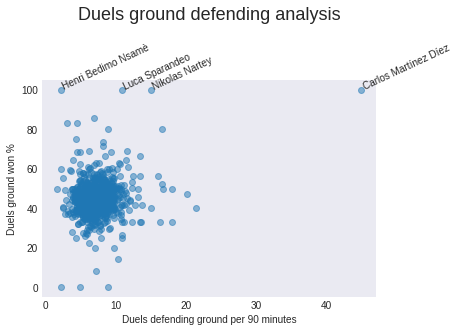

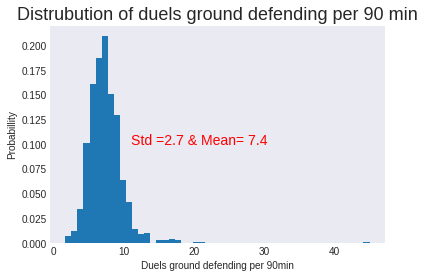

In [86]:
fig, ax = plt.subplots()

plt.scatter(x,y, alpha=0.5)
n = defenders.loc[i,['player_info_firstName','player_info_lastName']].values
names = list(map(lambda x: x[0] +" " +x[1], n))

for ii, txt in enumerate(names):
    if x[ii] > 30 or y[ii] > 90:
        ax.annotate(txt, (x[ii], y[ii]), rotation=25)

plt.xlabel('Duels defending ground per 90 minutes')
plt.ylabel('Duels ground won %')

plt.title('Duels ground defending analysis', pad=60, fontsize=18)
plt.show()


plt.figure()

plt.title('Distrubution of duels ground defending per 90 min', fontsize=18)
plt.hist(x, density=True, bins=50)
plt.ylabel('Probabillity')
plt.xlabel('Duels ground defending per 90min')
stdX=np.std(x)
meanX = np.mean(x)
stdY  = np.std(y)
meanY = np.mean(y)
plt.text(11,0.1,'Std =' +str(round(stdX,1))+ ' & Mean= ' +str(round(meanX,1)), c='r', fontsize=14)

plt.show()

In [87]:
from scipy import stats

## Deal with outliers

Carlos MArtinez has one game played
Luca Sparando has 9 minuts

Therefor, zscore of 2 or more is subject to misionformation as with highest probaility depends on a very small amounbt of minutes. 

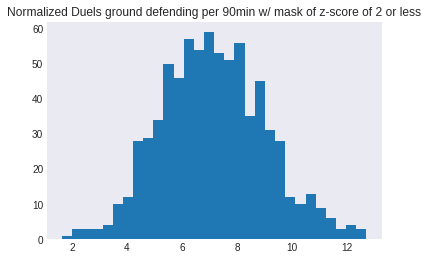

In [88]:
plt. hist((x[(stats.zscore(x) < 2)]), bins=30)
plt.title('Normalized Duels ground defending per 90min w/ mask of z-score of 2 or less')
plt.show()

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard = StandardScaler() 
minMax = MinMaxScaler() 


pd.DataFrame(standard.fit_transform(rank), columns= rank.columns).describe()
# df_standard = pd.DataFrame(standard.fit_transform(rank), rank.columns)


,passes_acc_Simple pass %,passes_acc_High pass %,passes_acc_Head pass %,duels_Ground defending duel %,duels_Air duel %
count,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02
mean,-3.087313e-16,1.105903e-16,-4.285374e-16,-1.566696e-16,4.147137e-17
std,1.000649e+00,1.000649e+00,1.000649e+00,1.000649e+00,1.000649e+00
min,-1.562556e+01,-3.686854e+00,-4.094694e+00,-4.715660e+00,-2.641029e+00
25%,-3.993521e-01,-4.861613e-01,-2.736120e-01,-5.416809e-01,-5.227576e-01
50%,1.698982e-01,4.864145e-02,9.782033e-02,-5.062452e-02,-7.723737e-02
75%,5.536282e-01,5.155124e-01,4.489176e-01,4.796984e-01,4.339948e-01
max,1.433535e+00,3.369081e+00,2.266362e+00,5.719288e+00,4.455179e+00


### One score for Duels for defrenders


In [90]:
rank = defPassRank.merge(defDuelRank, on='playerId', how='inner')
rank = rank.filter(regex='%')
rank.describe()

,passes_acc_Simple pass %,passes_acc_High pass %,passes_acc_Head pass %,duels_Ground defending duel %,duels_Air duel %
count,771.000000,771.000000,771.000000,771.000000,771.000000
mean,0.915967,0.522518,0.643713,0.451910,0.372175
std,0.058658,0.141817,0.157309,0.095894,0.141012
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.892557,0.453617,0.600699,0.400000,0.298507
50%,0.925926,0.529412,0.659091,0.447059,0.361290
75%,0.948420,0.595579,0.714286,0.497881,0.433333
max,1.000000,1.000000,1.000000,1.000000,1.000000


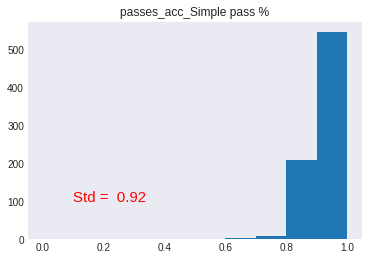

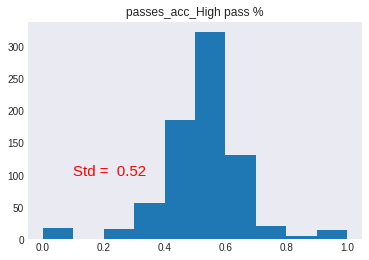

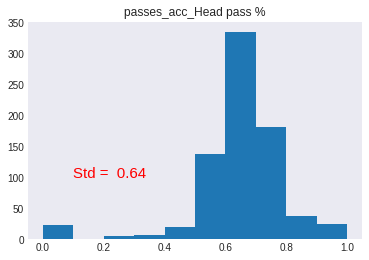

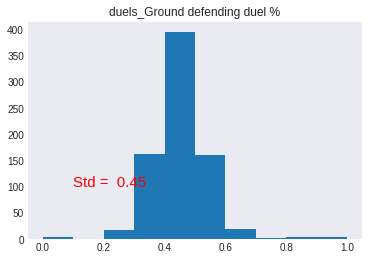

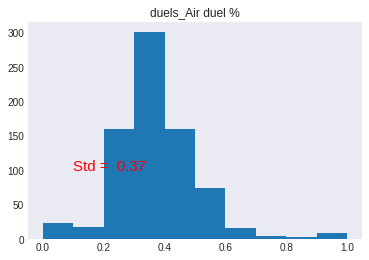

In [91]:
for column in rank.columns:
    plt.figure()
    plt.title(str(column))
    plt.hist(rank.loc[:,column])
    plt.text(0.1,100,'Std =  ' + str(round(np.mean(rank.loc[:,column]),2)), color='red', fontsize=15 )

In [92]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard = StandardScaler() 
minMax = MinMaxScaler() 
power = PowerTransformer(standardize=True)


rank_stand = standard.fit_transform(rank)
rank_min_max = minMax.fit_transform(rank)
rank_power = power.fit_transform(rank)


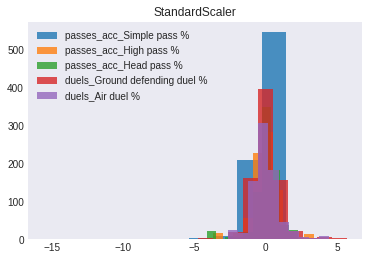

In [93]:
for x in np.arange(rank_power.shape[1]):

    plt.hist(rank_stand[:,x], label=rank.columns[x], alpha=0.8)
    plt.title('StandardScaler')
plt.legend(loc='upper left')
plt.show()

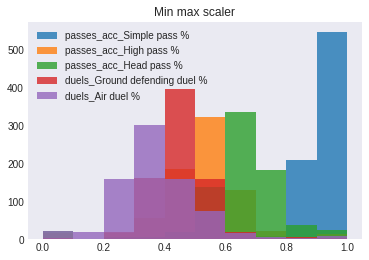

In [94]:
for x in np.arange(rank_power.shape[1]):
    plt.hist(rank_min_max[:,x], label=rank.columns[x], alpha=0.8)
    plt.title('Min max scaler')
plt.legend(loc='upper left')
plt.show()

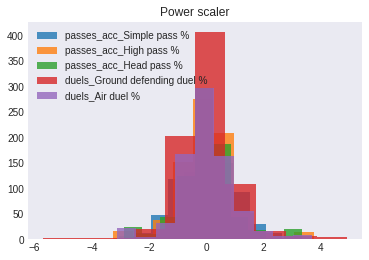

In [95]:
for x in np.arange(rank_power.shape[1]):
    plt.title('Power scaler')
    plt.hist(rank_power[:,x], label=rank.columns[x], alpha=0.8)
plt.legend(loc='upper left')
plt.show()

In [96]:
rankScaledDf = pd.DataFrame(rank_power, columns=rank.columns)

In [97]:
rankScaledDf.index= rank.index

In [98]:
rankScaledDf

,passes_acc_Simple pass %,passes_acc_High pass %,passes_acc_Head pass %,duels_Ground defending duel %,duels_Air duel %
playerId,,,,,
36,1.384739,0.318721,0.619664,0.464529,0.992889
48,0.864550,0.162687,0.374628,-1.751634,-0.620827
74,1.796861,-0.654507,-0.304566,-1.145551,0.085931
77,1.097438,0.801200,0.235334,0.327267,0.205250
102,1.297989,0.104115,-0.606413,-1.390565,-1.273014
...,...,...,...,...,...
493725,-2.411243,-3.280206,-2.874015,0.532686,-3.139175
499295,-0.883685,3.765045,3.325903,3.788473,2.229004
503185,2.650007,-3.280206,-2.874015,2.141800,-3.139175


In [115]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(rankScaledDf.values)
X = pca.transform(rankScaledDf.values)

In [116]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(rankScaledDf.values)
kmeans


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

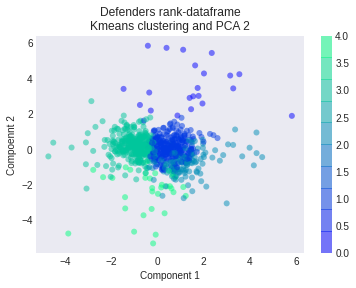

In [168]:
plt.title('Defenders rank-dataframe\nKmeans clustering and PCA 2')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_,  edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.xlabel('Component 1')
plt.ylabel('Compoennt 2')
plt.colorbar();

In [118]:
X.shape

(771, 3)

In [119]:
np.unique(defenders[kmeans.labels_ == 4].filter(regex=('^player_info_team$')).values, return_counts=True)

(array(['1. FC Köln', 'AS Roma', 'BV Borussia 09 Dortmund',
        'Benevento Calcio', 'Deportivo Alavés',
        'Espérance Sportive Troyes Aube Champagne',
        'FC Girondins de Bordeaux', 'FC Schalke 04', 'Genoa CFC',
        'Hellas Verona FC', 'Hertha BSC', 'Levante UD', 'Liverpool FC',
        'Málaga Club de Fútbol', "O.G.C. Nice Côte d'Azur",
        'Olympique Lyonnais', 'Olympique de Marseille',
        'RC Strasbourg Alsace', 'Real Club Deportivo de La Coruña',
        'Real Madrid Club de Fútbol', 'Reial Club Deportiu Espanyol',
        'SS Lazio', 'Stade Malherbe Caen', 'Stade Rennais FC',
        'Toulouse FC', 'UC Sampdoria', 'UD Las Palmas',
        'Valencia Club de Fútbol', 'Villarreal Club de Fútbol'],
       dtype=object),
 array([2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]))

In [120]:
rankScaledDf.describe()

,passes_acc_Simple pass %,passes_acc_High pass %,passes_acc_Head pass %,duels_Ground defending duel %,duels_Air duel %
count,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02,7.710000e+02
mean,2.949075e-16,-1.013744e-16,-2.534361e-16,2.672599e-16,-4.423612e-16
std,1.000649e+00,1.000649e+00,1.000649e+00,1.000649e+00,1.000649e+00
min,-3.070206e+00,-3.280206e+00,-2.874015e+00,-5.714044e+00,-3.139175e+00
25%,-7.297088e-01,-5.194070e-01,-4.381751e-01,-5.241455e-01,-4.907728e-01
50%,3.545987e-02,1.426743e-02,-2.055283e-02,-1.740928e-02,-2.153310e-02
75%,6.775368e-01,4.964727e-01,4.122279e-01,5.110525e-01,4.876905e-01
max,2.650007e+00,3.765045e+00,3.325903e+00,4.912661e+00,3.696624e+00


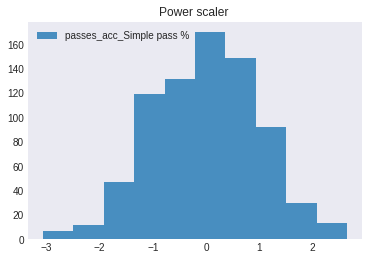

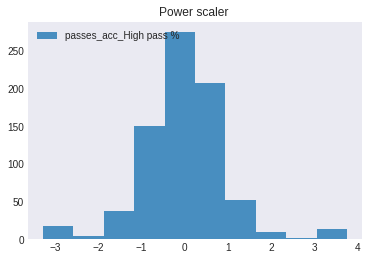

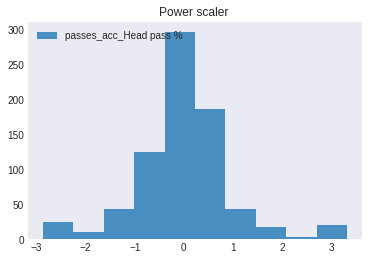

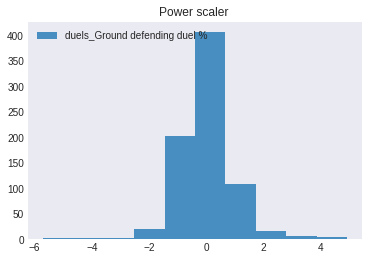

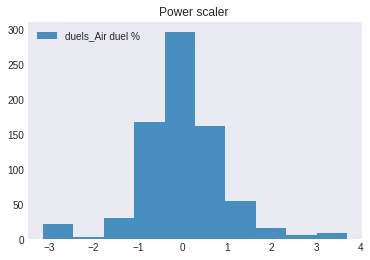

In [121]:
for x in np.arange(rankScaledDf.shape[1]):
    plt.figure()
    plt.title('Power scaler ')
    plt.hist(rankScaledDf.iloc[:,x], label=rankScaledDf.columns[x], alpha=0.8)
    plt.legend(loc='upper left')
plt.show()

$\large x_{normalized} = (b - a) \frac{x-min(X)}{max(X)-min(X)}+a$

*****
## Midfielders

In [173]:
midfielders.filter(regex=('shots')).filter(regex='%')

,shots_shot_goal %,shots_shot_opportunity %,shots_shot_acc %
playerId,,,
54,0.125000,0.612500,0.412500
56,0.000000,1.000000,1.000000
93,0.040000,0.720000,0.360000
114,0.047619,0.666667,0.285714
116,0.027778,0.527778,0.222222
...,...,...,...
471771,0.000000,0.750000,0.500000
476054,0.000000,0.000000,0.000000
482491,0.000000,0.666667,0.000000


In [174]:
midPasses = midfielders.loc[:, ['passes_acc_Simple pass %', 'passes_acc_High pass %', 'passes_acc_Smart pass %']]
midDuels = midfielders.loc[:,['duels_Ground defending duel %', 'duels_Ground attacking duel %']]
midShots = midfielders.loc[:, ['shots_shot_acc %','shots_shot_opportunity %']]
midMinutesPer = midfielders.loc[:,'matches_minutes %']
names = midfielders.loc[:,'player_info_lastName']

Text(0.4, 0.9, 'Pearsons coeficient: -0.05')

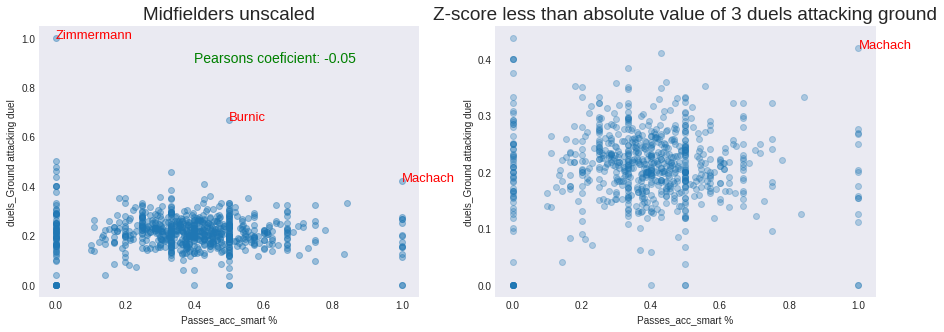

In [282]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

x = midPasses.loc[:,'passes_acc_Smart pass %']
ax1.set_xlabel('Passes_acc_smart %')
ax1.set_ylabel('duels_Ground attacking duel')
y = midDuels.loc[:,'duels_Ground attacking duel %']
x1 = x[abs(stats.zscore(y) < 3)]
y1 = y[abs(stats.zscore(y) < 3)]
ax2.set_title('Z-score less than absolute value of 3 duels attacking ground',fontsize=19)
ax2.scatter(x1,y1, alpha=.3)
ax2.set_xlabel('Passes_acc_smart %')
ax2.set_ylabel('duels_Ground attacking duel')
oy = y1[x1 == 1][y1[x1 == 1] > 0.4]
ax2.annotate(names.loc[oy.index[0]], (1,  oy.values[0]),fontsize=13,color='red')

for i, txt in zip(names.index, names.values):
    if y[i] > 0.6:
        ax1.annotate(names.loc[i], (x[i],y[i]),fontsize=13,color='red')


# plt.show()
ax1.scatter(x,y, alpha=.4)
ax1.annotate(names.loc[oy.index[0]], (1,  oy.values[0]),fontsize=13,color='red')
ax1.set_title('Midfielders unscaled',fontsize=19)
ax1.annotate('Pearsons coeficient: ' + str(round(np.corrcoef(x,y)[0][1],2)),(0.4, 0.9),color='green',fontsize=14)

How more games a  player have played how more certain and trustworthy the stats are. Therefore each score is normalized by multiplying by the % of minutes to all minutes played in the leauge that season.

Text(0, 0.5, 'duels_Ground attacking duel')

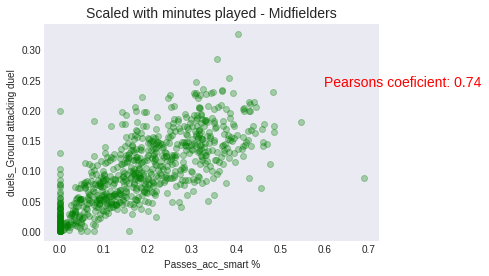

In [283]:
xScaledMinutes = x * midMinutesPer
yScaledMinutes = y * midMinutesPer
plt.scatter(xScaledMinutes,yScaledMinutes, alpha=0.3, c='green')
plt.title('Scaled with minutes played - Midfielders', fontsize=14)
# print('Pearsons coef fopr unscaled',np.corrcoef(x,y))
# print('Pearsons coef fopr scaled',np.corrcoef(xScaledMinutes,yScaledMinutes))
plt.text(x=0.6,y=.24,s="Pearsons coeficient: "+str(round(np.corrcoef(xScaledMinutes,yScaledMinutes)[0][1],2)),fontsize=14,color='red')
plt.xlabel('Passes_acc_smart %')
plt.ylabel('duels_Ground attacking duel')



### Minutes played normalized

In [292]:
midMinutesPer = midfielders.loc[:,'matches_minutes %']
midPasses = midfielders.loc[:, ['passes_acc_Simple pass %', 'passes_acc_High pass %', 'passes_acc_Smart pass %']].mul(midMinutesPer, axis=0)
midDuels = midfielders.loc[:,['duels_Ground defending duel %', 'duels_Ground attacking duel %']].mul(midMinutesPer, axis=0)
midShots = midfielders.loc[:, ['shots_shot_acc %','shots_shot_opportunity %']].mul(midMinutesPer, axis=0)

## Scale


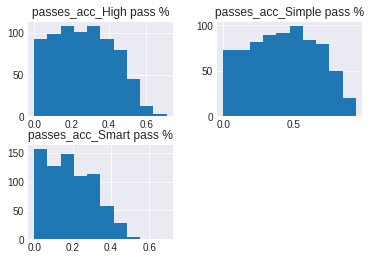

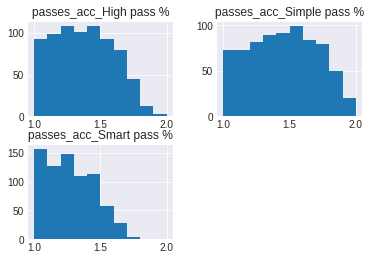

,passes_acc_Simple pass %,passes_acc_High pass %,passes_acc_Smart pass %
count,742.000000,742.000000,742.000000
mean,0.425391,0.266144,0.187552
std,0.234972,0.157056,0.126013
min,0.000585,0.000000,0.000000
25%,0.235362,0.135682,0.088188
50%,0.423034,0.259692,0.177406
75%,0.621108,0.380437,0.286810
max,0.936047,0.707499,0.689254


In [293]:
midpasses_scaled =midPasses.apply(lambda x: (x - min(x)) / (max(x)-min(x))+1,  axis=0)
midPasses.hist()
midpasses_scaled.hist()
plt.show()
midPasses.describe()

In [297]:
###Get a ranking for each mainevent 

##1-33 because of 3 equaly important subevetns in passes
midPasses_rank = midPasses.apply(lambda x: 32 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)

##1-50 because of 2 equaly important subevetns in passes
midDuels_rank = midDuels.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)

##1-50 because of 2 equaly important subevetns in passes
midShots_rank = midShots.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)

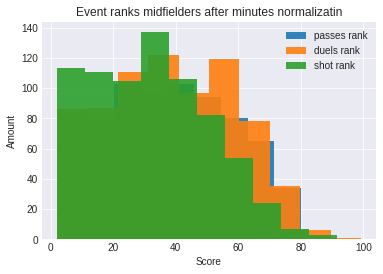

In [304]:
midPasses_rank.hist(label='passes rank',alpha=.9)

midDuels_rank.hist(label='duels rank',alpha=.9)

midShots_rank.hist(label='shot rank',alpha=0.9)
plt.title('Event ranks midfielders after minutes normalizatin')
plt.xlabel('Score')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.show()

In [ ]:
midPasses_rank.hist(label='passes rank',alpha=.9)

midDuels_rank.hist(label='duels rank',alpha=.9)

midShots_rank.hist(label='shot rank',alpha=0.9)
plt.title('Event ranks midfielders after weight normalization')
plt.xlabel('Score')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.show()

### Aggregated player rank - MIDFIELDERS

In [306]:
###Get a ranking for each mainevent 

##1-50 
midPasses_rank_final = midPasses_rank.apply(lambda x: 49 * (x - min(midPasses_rank.values)) / (max(midPasses_rank.values)-min(midPasses_rank.values))+1)

# ##1-34
midDuels_rank_final = midDuels_rank.apply(lambda x: 34 * (x - min(midDuels_rank.values)) / (max(midDuels_rank.values)-min(midDuels_rank.values))+1)

# ##1-15
midShots_rank_final = midShots_rank.apply(lambda x: 14 * (x - min(midShots_rank.values)) / (max(midShots_rank.values)-min(midShots_rank.values))+1)

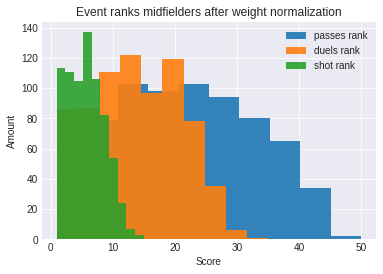

In [307]:
midPasses_rank_final.hist(label='passes rank',alpha=.9)

midDuels_rank_final.hist(label='duels rank',alpha=.9)

midShots_rank_final.hist(label='shot rank',alpha=0.9)
plt.title('Event ranks midfielders after weight normalization')
plt.xlabel('Score')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.show()

In [279]:
data = pd.DataFrame({'pass_rank': midPasses_rank_final,'duels_rank':midDuels_rank_final, 'shots_rank':midShots_rank_final})
data.describe()


,pass_rank,duels_rank,shots_rank
count,742.000000,742.000000,742.000000
mean,30.786408,20.144070,7.569107
std,5.196646,2.878205,2.364112
min,1.000000,1.000000,1.000000
25%,28.247278,18.670572,6.371154
50%,31.204468,20.135075,7.826923
75%,33.838107,21.708923,8.777778
max,50.000000,35.000000,15.000000


In [229]:
midAggRank = data.sum(axis=1)
data['agg_event_rank'] = midAggRank
MidfieldEventRankings = data
MidfieldEventRankings.describe()

,pass_rank,duels_rank,shots_rank,agg_event_rank
count,742.000000,742.000000,742.000000,742.000000
mean,30.786408,20.144070,7.569107,58.499586
std,5.196646,2.878205,2.364112,6.102459
min,1.000000,1.000000,1.000000,10.000000
25%,28.247278,18.670572,6.371154,55.446639
50%,31.204468,20.135075,7.826923,58.708280
75%,33.838107,21.708923,8.777778,62.195603
max,50.000000,35.000000,15.000000,80.041599


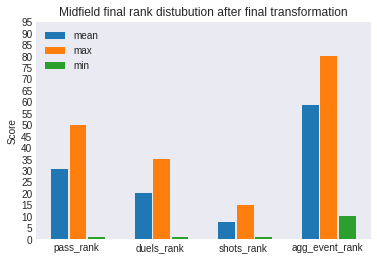

In [240]:
a = data.describe().loc[['mean','max','min'],:]
x = np.arange(a.shape[1])
plt.bar(x, a.loc['mean',:],width=.2,label='mean')
plt.bar(x+.22,  a.loc['max',:],width=.2,label='max')
plt.bar(x+.44, a.loc['min',:],width=.2,label='min')
plt.legend(loc='best')
plt.xticks(x+.2, data.columns)
plt.title('Midfield final rank distubution after final transformation')
plt.ylabel('Score')
plt.yticks(np.arange(0,100,5))
plt.show()


### Concatenate rankings into a DataFrame with some player_info

In [276]:
cols = list(MidfieldEventRankings.columns)
cols = cols + ['player_info_firstName','player_info_lastName', 'player_info_team','player_info_age']
best20Mid = MidfieldEventRankings.merge(midfielders, on='playerId',how='inner').sort_values(by='agg_event_rank',ascending=False).head(10).loc[:, cols]

In [277]:
best20Mid

,pass_rank,duels_rank,shots_rank,agg_event_rank,player_info_firstName,player_info_lastName,player_info_team,player_info_age
playerId,,,,,,,,
8249,44.833518,21.958081,13.250000,80.041599,Marouane,Fellaini-Bakkioui,Manchester United FC,33
299557,39.845924,22.206079,15.000000,77.052003,Ádám,Nagy,Bologna FC 1909,25
356908,33.015287,34.500000,6.000000,73.515287,Dzenis,Burnic,VfB Stuttgart 1893,22
365880,50.000000,18.758929,4.500000,73.258929,Daichi,Kamada,Eintracht Frankfurt,24
8142,43.488971,24.341463,5.375000,73.205434,Jason,Puncheon,Crystal Palace FC,34
134797,35.714163,26.788136,9.750000,72.252299,Hernani,Azevedo Júnior,AS Saint-Étienne,26
20591,36.465250,20.472888,15.000000,71.938139,Gélson da Conceição Tavares,Fernandes,Eintracht Frankfurt,34
3543,38.606793,23.657314,9.647059,71.911166,Borja,Valero Iglesias,FC Internazionale Milano,35
25403,43.517901,21.264493,7.000000,71.782394,Jordan,Ferri,Olympique Lyonnais,28


### Age
As seen above the most of the 10 best ranked midfielders have an age above the mean of 29 or within a standard deviation. Those players are interesting for a scouting firm but the most intersting players are good players that are still young and have a growth of value in after acquisitions. 

From the mean to 18, 4 points extra is added.

In [355]:
age_rank_dict = dict(zip(np.arange(18,29), np.arange(30,1,-3)))
age_rank_dict

ages = MidfieldEventRankings.merge(midfielders,how='inner', on='playerId').loc[:,'player_info_age']


print(age_rank_dict)
age_rank = []
for age in ages:
    if age >= (28):
        age_rank.append(0)
    elif age < (18):
        age_rank.append(44)
    else:
        age_rank.append(age_rank_dict[age])
        
MidfieldEventRankings.loc[:,'rank_age'] = age_rank
MidfieldEventRankings

{18: 30, 19: 27, 20: 24, 21: 21, 22: 18, 23: 15, 24: 12, 25: 9, 26: 6, 27: 3}


,pass_rank,duels_rank,shots_rank,agg_event_rank,rank_age
playerId,,,,,
54,31.138560,22.394368,8.175000,61.707929,0
56,31.209978,20.266667,15.000000,66.476644,3
93,28.975234,20.439323,8.560000,57.974557,0
114,30.229061,20.953879,7.666667,58.849606,0
116,30.323900,16.539461,6.250000,53.113361,0
...,...,...,...,...,...
471771,14.119675,17.655172,9.750000,41.524848,21
476054,13.352941,13.750000,1.000000,28.102941,18
482491,36.678855,22.409091,5.666667,64.754613,21


*******

## Forwards

In [308]:
forPasses = forwards.loc[:, ['passes_acc_Simple pass %', 'passes_acc_Head pass %', 'passes_acc_Smart pass %']]
forDuels = forwards.loc[:,['duels_Ground attacking duel %', 'duels_Air duel %']]
forShots = forwards.loc[:, ['shots_shot_acc %','shots_shot_opportunity %','shots_shot_goal %']]
forMinutesPer = forwards.loc[:,'matches_minutes %']
namesFor = forwards.loc[:,'player_info_lastName']

/home/douglas/.local/share/virtualenvs/flask-d-50si98/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


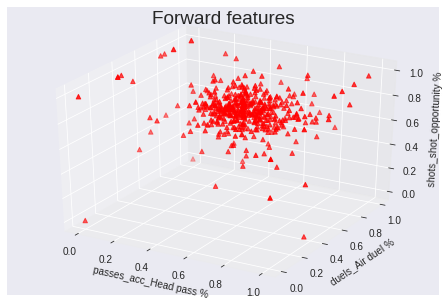

In [309]:

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure('')
ax = Axes3D(fig)

x = forwards.loc[:,'passes_acc_Head pass %']
y = forwards.loc[:,'duels_Air duel %']
z = forwards.loc[:, 'shots_shot_opportunity %']

ax.set_xlabel('passes_acc_Head pass %')
ax.set_ylabel('duels_Air duel %')
ax.set_zlabel('shots_shot_opportunity %')
ax.scatter3D(x,y,z,marker='^',color='red',depthshade=True)
ax.set_title('Forward features', fontsize=19)

plt.tight_layout()

,duels_Ground attacking duel %,duels_Air duel %
count,446.000000,446.000000
mean,0.115223,0.251995
std,0.070677,0.159420
min,0.000000,0.000000
25%,0.059821,0.127012
50%,0.108606,0.234259
75%,0.165590,0.365599
max,0.293407,0.760802


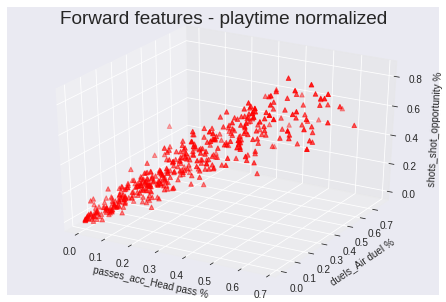

In [366]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
forPasses = forwards.loc[:, ['passes_acc_Simple pass %', 'passes_acc_Head pass %', 'passes_acc_Smart pass %']].mul(forMinutesPer, axis=0)
forDuels = forwards.loc[:,['duels_Ground attacking duel %', 'duels_Air duel %']].mul(forMinutesPer, axis=0)
forShots = forwards.loc[:, ['shots_shot_acc %','shots_shot_opportunity %','shots_shot_goal %']].mul(forMinutesPer, axis=0)
fig = plt.figure('')
ax = Axes3D(fig)


x = forPasses.loc[:,'passes_acc_Head pass %']
y = forDuels.loc[:,'duels_Air duel %']
z = forShots.loc[:, 'shots_shot_opportunity %']

ax.set_xlabel('passes_acc_Head pass %')
ax.set_ylabel('duels_Air duel %')
ax.set_zlabel('shots_shot_opportunity %')
ax.scatter3D(x.values,y.values,z.values,  c='r', marker='^',depthshade=True)
ax.set_title('Forward features - playtime normalized', fontsize=19)

forDuels.describe()

## Subevent ranks
#### Rescale each subevent so the potential maximum sum for a row adds up to 100.

In [369]:

##1-33 because of 3 equaly important subevetns in passes
forPasses_scaled =forPasses.apply(lambda x: 32 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)

##1-50 because of 2 equaly important subevetns in passes
forDuels_scaled = forDuels.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)

##1-50 because of 2 equaly important subevetns in passes
forShots_scaled = forShots.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0).sum(axis=1)


In [360]:
EventRankings = pd.DataFrame({'rank_pass': forPasses_scaled,'rank_duels':forDuels_scaled, 'rank_shots':forShots})
EventRankings.head(7)

,rank_pass,rank_duels,rank_shots
playerId,,,
66,3.225138,2.619439,3.408493
91,10.899676,4.375905,8.715461
118,68.842024,69.848959,96.683241
120,8.893032,9.802375,9.957752
122,75.963136,93.463705,100.680700
123,20.102988,20.933006,20.466119
151,35.664680,38.298882,48.228044


### CONCATENATE AND AGGREGATED RANK

##### Rescale each feature to a range that corresponds to the desired weight and all is summed to a potential 100. 

In [371]:
##1-30
forPasses_rank_final = forPasses_scaled.apply(lambda x: 29 * (x - min(forPasses_scaled.values)) / (max(forPasses_scaled.values)-min(forPasses_scaled.values))+1)

# ##1-30
forDuels_rank_final = forDuels_scaled.apply(lambda x: 29 * (x - min(forDuels_scaled.values)) / (max(forDuels_scaled.values)-min(forDuels_scaled.values))+1)

# ##1-15
forShots_rank_final = forShots_scaled.apply(lambda x: 39 * (x - min(forShots_scaled.values)) / (max(forShots_scaled.values)-min(forShots_scaled.values))+1)


## SUM to get overall rank
EventRankings['rank_overall'] = (forPasses_rank_final + forDuels_rank_final + forShots_rank_final)
EventRankings

,rank_pass,rank_duels,rank_shots,rank_overall
playerId,,,,
66,3.225138,2.619439,3.408493,3.378715
91,10.899676,4.375905,8.715461,7.833401
118,68.842024,69.848959,96.683241,70.898813
120,8.893032,9.802375,9.957752,9.241863
122,75.963136,93.463705,100.680700,81.753757
...,...,...,...,...
491409,10.218378,14.981625,18.038651,13.483323
498357,21.127257,19.656866,22.842412,19.769526
521939,3.521594,3.616540,6.595978,4.647277


### Age extra points

In [373]:
age_rank_dict = dict(zip(np.arange(18, 29), np.arange(30, 1, -3)))

ages = EventRankings.merge(forwards, how='inner', on='playerId').loc[:, 'player_info_age']

age_rank = []
for age in ages:
    if age >= (28):
        age_rank.append(0)
    elif age < (18):
        age_rank.append(30)
    else:
        age_rank.append(age_rank_dict[age])
EventRankings.loc[:, 'rank_age'] = age_rank
EventRankings.loc[:,'rank_overall'] = EventRankings.loc[:,'rank_overall']+ EventRankings.loc[:,'rank_age']
EventRankings = EventRankings.sort_values(by="rank_overall",ascending=False)
EventRankings

,rank_pass,rank_duels,rank_shots,rank_overall,rank_age
playerId,,,,,
395636,77.736883,65.322616,141.934059,108.493376,12
300485,74.405998,65.594559,114.409378,106.107054,15
173214,81.250775,69.879716,104.189245,100.921832,12
353833,74.575525,50.527467,84.392460,99.314235,18
269152,77.823836,84.487699,104.483295,98.529204,9
...,...,...,...,...,...
3424,6.493489,7.345419,9.024243,7.439287,0
15201,4.514664,7.068331,6.509203,6.038132,0
26093,3.952417,5.882411,4.702054,4.995232,0


*****
## Unsupervised learning - CLustering K-MEANS

We perform a unssupervised algorithm - K- means to see how the datasets ability to group was changed with the scaling and transformation actions. We will se in a PCA with the two first components if this abillity changes. 


In [195]:
from sklearn import decomposition
from sklearn.cluster import KMeans

# pca = decomposition.PCA(n_components=3)
# pca.fit(rankScaledDf.values)
# X = pca.transform(rankScaledDf.values)

In [379]:
forPasses = forwards.loc[:, ['passes_acc_Simple pass %', 'passes_acc_Head pass %', 'passes_acc_Smart pass %']]
forDuels = forwards.loc[:,['duels_Ground attacking duel %', 'duels_Air duel %']]
forShots = forwards.loc[:, ['shots_shot_acc %','shots_shot_opportunity %','shots_shot_goal %']]
unscaled = forPasses.merge(forDuels, on='playerId', how='inner').merge(forShots, on='playerId', how='inner')

In [381]:
unscaled.describe()

,passes_acc_Simple pass %,passes_acc_Head pass %,passes_acc_Smart pass %,duels_Ground attacking duel %,duels_Air duel %,shots_shot_acc %,shots_shot_opportunity %,shots_shot_goal %
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,0.850929,0.537492,0.358105,0.266096,0.579100,0.411457,0.760888,0.124121
std,0.048128,0.178433,0.198445,0.066830,0.144610,0.138192,0.142887,0.087475
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.826322,0.459135,0.260870,0.225852,0.498874,0.344828,0.698316,0.060606
50%,0.853434,0.541422,0.364510,0.267280,0.575320,0.400000,0.777778,0.120926
75%,0.882408,0.630435,0.479565,0.308280,0.666667,0.484804,0.846154,0.180118
max,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.600000


In [390]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(unscaled)

In [417]:
clusterIndices = kmeans.predict(unscaled)
centroids = kmeans.cluster_centers_

In [393]:
centroids

array([[0.84630052, 0.57156533, 0.31162877, 0.27215748, 0.5488258 ,
        0.46879444, 0.82728964, 0.15898777],
       [0.85772575, 0.55171879, 0.54104128, 0.26026653, 0.62319832,
        0.40382864, 0.74745102, 0.11999508],
       [0.84910552, 0.58649187, 0.17822384, 0.27300648, 0.55016236,
        0.29678277, 0.64404013, 0.07104242],
       [0.84769855, 0.11552964, 0.13531226, 0.2414427 , 0.60562205,
        0.40359098, 0.73393316, 0.07174908]])

##### The data is 8 dimensional and it isimpossible to visualize.

##### Therefore we perform a PCA analysis on the data to get down to fewer dimensiopn but keep as much information about the relationship between the data. 

## PCA - principal component analysis

In [415]:
pca = decomposition.PCA(n_components=2)
pca.fit(unscaled)
unscaledPCA = pca.transform(unscaled)

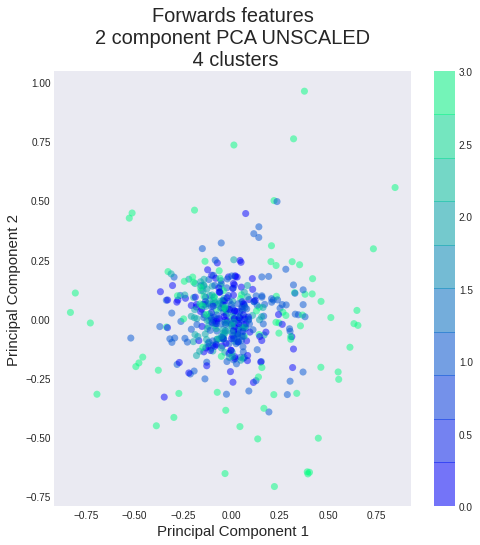

In [461]:
unscaledPCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Forwards features\n2 component PCA UNSCALED\n 4 clusters', fontsize = 20)
PCA1 = unscaledPCA[:,0]
PCA2 = unscaledPCA[:,1]
plt.scatter(PCA1,PCA2, c=clusterIndices,s=50, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.colorbar()

## Scaled minutes  - PCA k-means 4 cluster

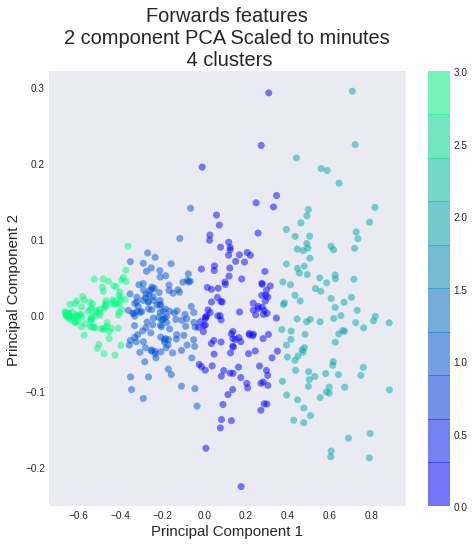

In [463]:
forMinutesPer = forwards.loc[:,'matches_minutes %']
forPasses = forwards.loc[:, ['passes_acc_Simple pass %', 'passes_acc_Head pass %', 'passes_acc_Smart pass %']].mul(forMinutesPer, axis=0)
forDuels = forwards.loc[:,['duels_Ground attacking duel %', 'duels_Air duel %']].mul(forMinutesPer, axis=0)
forShots = forwards.loc[:, ['shots_shot_acc %','shots_shot_opportunity %','shots_shot_goal %']].mul(forMinutesPer, axis=0)
scaled = forPasses.merge(forDuels, on='playerId', how='inner').merge(forShots, on='playerId', how='inner')


##Clusters KMEANS
clusterIndices = KMeans(n_clusters=4, random_state=0).fit_predict(scaled)


### PCA
pca = decomposition.PCA(n_components=2)
pca.fit(scaled)
scaledPCA = pca.transform(scaled)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Forwards features\n2 component PCA Scaled to minutes\n 4 clusters', fontsize = 20)
PCA1 = scaledPCA[:,0]
PCA2 = scaledPCA[:,1]
plt.scatter(PCA1,PCA2, c=clusterIndices,s=50, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.colorbar()
plt.show()

## PCA KMEANS scaled to minutes and weights

In [443]:
##1-33 because of 3 equaly important subevetns in passes
forPasses_scaled =forPasses.apply(lambda x: 32 * (x - min(x)) / (max(x)-min(x))+1,  axis=0)

##1-50 because of 2 equaly important subevetns in passes
forDuels_scaled = forDuels.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0)

##1-50 because of 2 equaly important subevetns in passes
forShots_scaled = forShots.apply(lambda x: 49 * (x - min(x)) / (max(x)-min(x))+1,  axis=0)

In [445]:
weigthFeatures = forPasses_scaled.merge(forDuels_scaled, on='playerId', how='inner').merge(forShots_scaled, on='playerId', how='inner')
weigthFeatures.describe()

,passes_acc_Simple pass %,passes_acc_Head pass %,passes_acc_Smart pass %,duels_Ground attacking duel %,duels_Air duel %,shots_shot_acc %,shots_shot_opportunity %,shots_shot_goal %
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,14.768574,12.421257,12.388301,20.242631,17.229932,19.405077,20.381355,13.206884
std,8.168129,7.499566,8.183044,11.803380,10.267574,11.824858,11.892294,10.637540
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.565255,6.096333,5.689199,10.990271,9.180313,9.224215,10.961270,4.355142
50%,14.234778,11.312998,11.480855,19.137594,16.087585,18.384372,19.374495,11.036450
75%,21.454608,17.841900,18.855138,28.654114,24.546643,28.712158,29.682418,20.073634
max,33.000000,33.000000,33.000000,50.000000,50.000000,50.000000,50.000000,50.000000


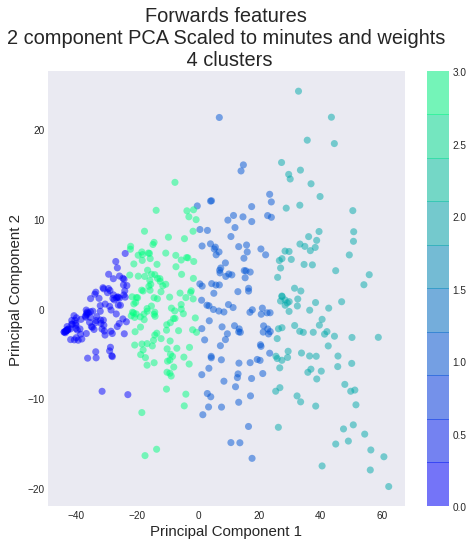

In [462]:

##Clusters KMEANS
clusterIndices = KMeans(n_clusters=4, random_state=0).fit_predict(weigthFeatures)


### PCA
pca = decomposition.PCA(n_components=2)
pca.fit(weigthFeatures)
scaledPCA = pca.transform(weigthFeatures)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Forwards features\n2 component PCA Scaled to minutes and weights\n 4 clusters', fontsize = 20)
PCA1 = scaledPCA[:,0]
PCA2 = scaledPCA[:,1]
plt.scatter(PCA1,PCA2, c=clusterIndices,s=50, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('winter', 10))
plt.colorbar()
plt.show()